<a href="https://colab.research.google.com/github/SebaDiezV/challenge_alura_store/blob/main/Challenge_AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [28]:
import pandas as pd
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [29]:
tienda2.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175


#1. Análisis de facturación



Calculamos el ingreso total de cada una de las tiendas:

In [30]:
ingreso_total_1 = int(sum(tienda['Precio']))
ingreso_total_2 = int(sum(tienda2['Precio']))
ingreso_total_3 = int(sum(tienda3['Precio']))
ingreso_total_4 = int(sum(tienda4['Precio']))


In [31]:
print(f'El ingreso total de cada una de las tiendas es el siguiente:\nTienda 1 tiene un ingreso total de {ingreso_total_1}\nTienda 2 tiene un ingreso total de {ingreso_total_2}\nTienda 3 tiene un ingreso total de {ingreso_total_3}\nTienda 4 tiene un ingreso total de {ingreso_total_4}')

El ingreso total de cada una de las tiendas es el siguiente:
Tienda 1 tiene un ingreso total de 1150880400
Tienda 2 tiene un ingreso total de 1116343500
Tienda 3 tiene un ingreso total de 1098019600
Tienda 4 tiene un ingreso total de 1038375700


Generamos un DataFrame para una mejor lectura

In [32]:
ventas_por_tienda ={'Tienda': ['Tienda 1', 'Tienda 2','Tienda 3', 'Tienda 4'],
                    'Ingreso Total': [ingreso_total_1,ingreso_total_2,ingreso_total_3,ingreso_total_4]}
df_ingreso_total = pd.DataFrame (ventas_por_tienda)
df_ingreso_total


,Tienda,Ingreso Total
0,Tienda 1,1150880400
1,Tienda 2,1116343500
2,Tienda 3,1098019600
3,Tienda 4,1038375700


Generamos un grafico de barras para una mejor compración entre las ventas de las tiendas

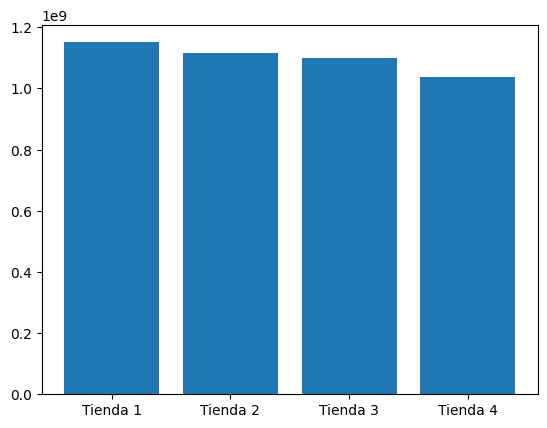

In [33]:
plt.bar(df_ingreso_total['Tienda'], df_ingreso_total['Ingreso Total'])
plt.show()

<h2>Conclusión en base a facturación</h2>

La tienda 1 es la que genra más ganacias para Don Juan, generando un total de 1.150.880.400.
La que genera menos ganacias es la tienda 4, generando un total de 1.038.375.700

# 2. Ventas por categoría

In [34]:
def ventas_categoria(datos_tienda):
  #Definiendo los productos disponibles
  productos = datos_tienda['Categoría del Producto']
  productos_unicos = list(set(productos))

  #Generando una lista de lista
  lista_productos=[]
  for producto in productos_unicos:
   lista=[i for i in productos if i == producto]
   lista_productos.append(lista)

  #Generando un diccionario con las ventas por categoria
  ventas_por_categoria = {productos_unicos[i]:len(lista_productos[i]) for i in range(len(productos_unicos))}
  #Ordenando diccionario de mayor a menor
  orden_por_valor_desc = dict(sorted(ventas_por_categoria.items(), key=lambda item: item[1], reverse=True))
  df_ventas = pd.DataFrame(list(orden_por_valor_desc.items()), columns=['Categoría', 'Ventas'])

  #Generando gráfico de torta
  plt.pie (df_ventas['Ventas'], labels = df_ventas['Categoría'])
  plt.show()

  return df_ventas


Generando un DataFrame y Gráfico de Torta por cada tienda para una mejor comparación de la cantidad de ventas

Ventas por categoria de tienda 1:


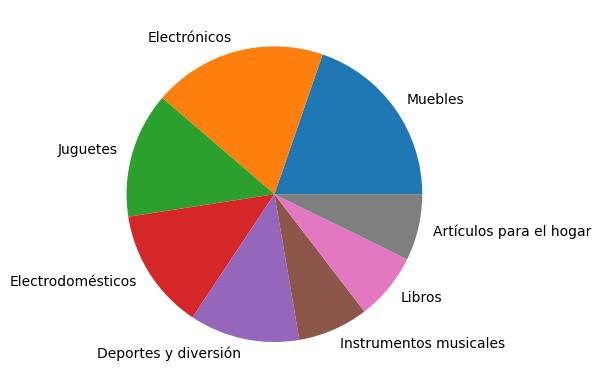

,Categoría,Ventas
0,Muebles,465
1,Electrónicos,448
2,Juguetes,324
3,Electrodomésticos,312
4,Deportes y diversión,284
5,Instrumentos musicales,182
6,Libros,173
7,Artículos para el hogar,171


In [35]:
print('Ventas por categoria de tienda 1:')
ventas_categoria(tienda)


Ventas por categoria de tienda 2:


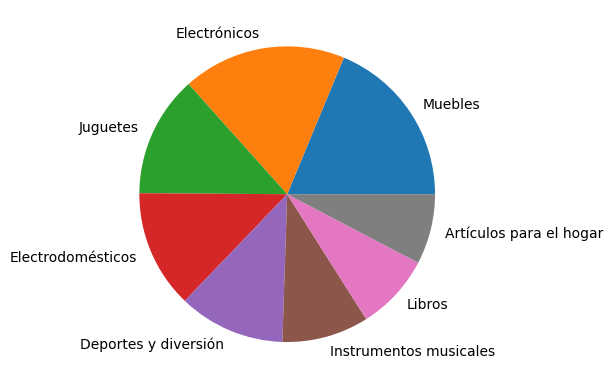

,Categoría,Ventas
0,Muebles,442
1,Electrónicos,422
2,Juguetes,313
3,Electrodomésticos,305
4,Deportes y diversión,275
5,Instrumentos musicales,224
6,Libros,197
7,Artículos para el hogar,181


In [36]:
print('Ventas por categoria de tienda 2:')
ventas_categoria(tienda2)

Ventas por categoria de tienda 3:


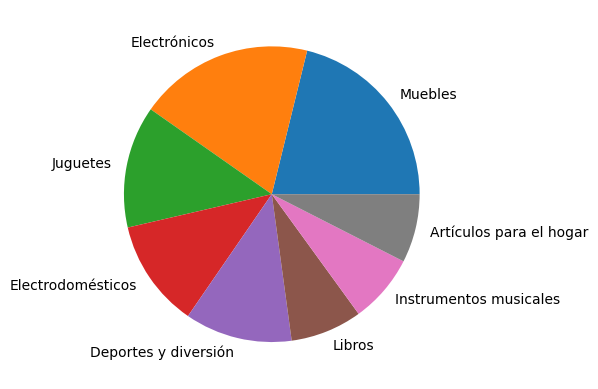

,Categoría,Ventas
0,Muebles,499
1,Electrónicos,451
2,Juguetes,315
3,Electrodomésticos,278
4,Deportes y diversión,277
5,Libros,185
6,Instrumentos musicales,177
7,Artículos para el hogar,177


In [37]:
print('Ventas por categoria de tienda 3:')
ventas_categoria(tienda3)

Ventas por categoria de tienda 4:


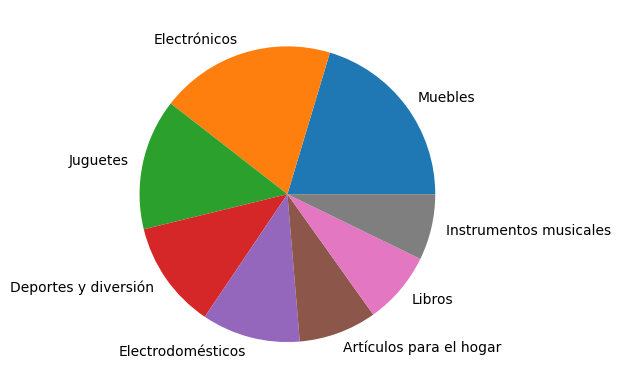

,Categoría,Ventas
0,Muebles,480
1,Electrónicos,451
2,Juguetes,338
3,Deportes y diversión,277
4,Electrodomésticos,254
5,Artículos para el hogar,201
6,Libros,187
7,Instrumentos musicales,170


In [38]:
print('Ventas por categoria de tienda 4:')
ventas_categoria(tienda4)

Generamos un DataFrame con la cantidad de ingreso por categoría

In [39]:
def ventas_categoria_ingresos(datos_tienda):
  #Creando un DataFrame con solo las categorias y el precio
  cat_precio=pd.DataFrame(datos_tienda, columns=['Categoría del Producto','Precio'])
  #Definiendo los productos disponibles
  totales= cat_precio.groupby('Categoría del Producto')['Precio'].sum()

  #Ordenando DataFrame de mayo a menor
  totales=totales.sort_values(ascending=False)

  #Generando gráfico de barras
  totales.sort_values().plot(kind='barh')
  plt.xlabel('Total Ingresos')
  plt.ylabel('Categoría')
  plt.grid(axis='x', linestyle='--',alpha=0.7)
  plt.tight_layout()
  plt.show


  return totales


Cantidad de ingreso por categoría en Tienda 1


,Precio
Categoría del Producto,
Electrónicos,429493500.0
Electrodomésticos,363685200.0
Muebles,187633700.0
Instrumentos musicales,91299000.0
Deportes y diversión,39290000.0
Juguetes,17995700.0
Artículos para el hogar,12698400.0
Libros,8784900.0


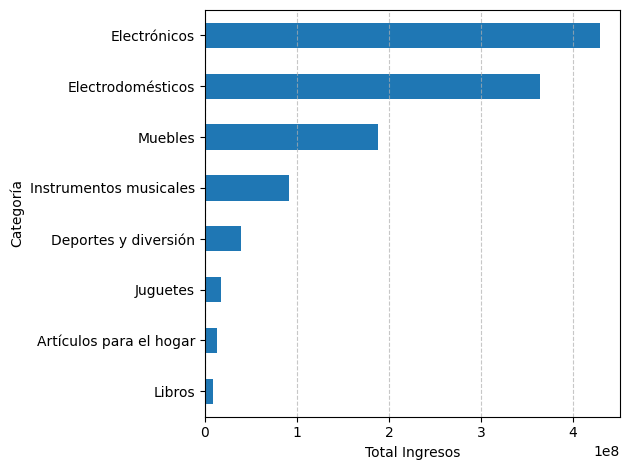

In [40]:
print('Cantidad de ingreso por categoría en Tienda 1')
ventas_categoria_ingresos(tienda)

Cantidad de ingreso por categoría en Tienda 2


,Precio
Categoría del Producto,
Electrónicos,410831100.0
Electrodomésticos,348567800.0
Muebles,176426300.0
Instrumentos musicales,104990300.0
Deportes y diversión,34744500.0
Juguetes,15945400.0
Artículos para el hogar,14746900.0
Libros,10091200.0


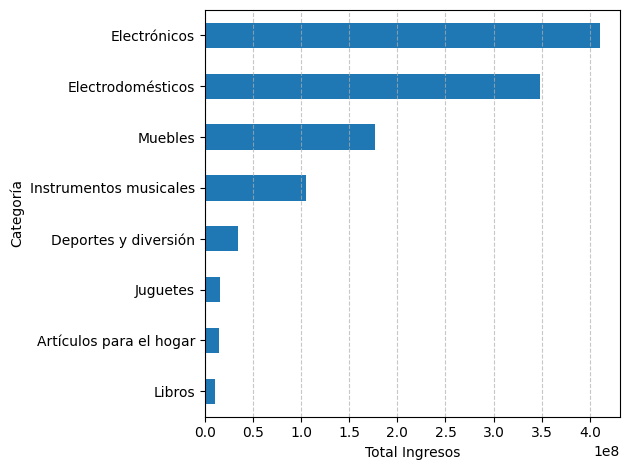

In [41]:
print('Cantidad de ingreso por categoría en Tienda 2')
ventas_categoria_ingresos(tienda2)

Cantidad de ingreso por categoría en Tienda 3


,Precio
Categoría del Producto,
Electrónicos,410775800.0
Electrodomésticos,329237900.0
Muebles,201072100.0
Instrumentos musicales,77380900.0
Deportes y diversión,35593100.0
Juguetes,19401100.0
Artículos para el hogar,15060000.0
Libros,9498700.0


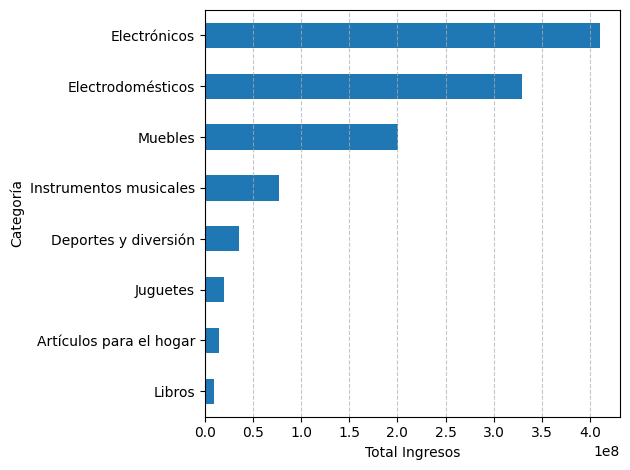

In [42]:
print('Cantidad de ingreso por categoría en Tienda 3')
ventas_categoria_ingresos(tienda3)

Cantidad de ingreso por categoría en Tienda 4


,Precio
Categoría del Producto,
Electrónicos,409476100.0
Electrodomésticos,283260200.0
Muebles,192528900.0
Instrumentos musicales,75102400.0
Deportes y diversión,33350100.0
Juguetes,20262200.0
Artículos para el hogar,15074500.0
Libros,9321300.0


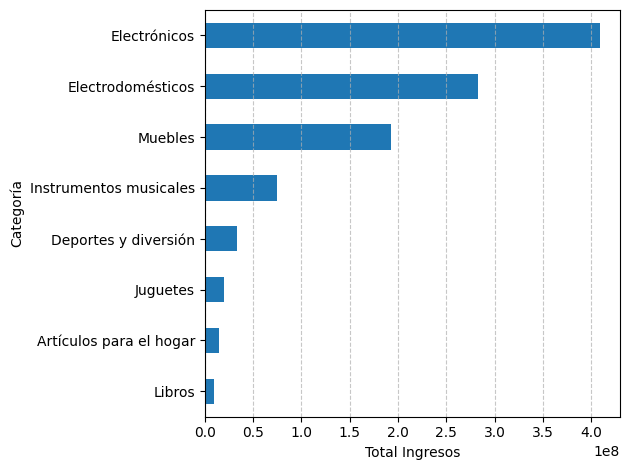

In [43]:
print('Cantidad de ingreso por categoría en Tienda 4')
ventas_categoria_ingresos(tienda4)

<h2>Conclusión en base a ventas</h2>
La categoría de producto que tiene mejor rendimiento en cuanto a ventas en todas las tiendas es Muebles, mientras la categoría con menos ventas en las tiendas 1 a la 3 es Artículos para el hogar, en la tienda 4 la categoría con menos ventas es Instrumentos musicales.
Por otro lado, la categoria que mas ganancias genera en las 4 tiendas es Electronicos y la que genera menos ganancias es Libros

# 3. Calificación promedio de la tienda


In [44]:
promedio_tienda1 = round(sum(tienda['Calificación'])/len(tienda['Calificación']),2)
promedio_tienda2 = round(sum(tienda2['Calificación'])/len(tienda2['Calificación']),2)
promedio_tienda3 = round(sum(tienda3['Calificación'])/len(tienda3['Calificación']),2)
promedio_tienda4 = round(sum(tienda4['Calificación'])/len(tienda4['Calificación']),2)
print(f'La calificación promedio de las tiendas es la siguiente:\nTienda 1: {promedio_tienda1}\nTienda 2: {promedio_tienda2}\nTienda 3: {promedio_tienda3}\nTienda 4: {promedio_tienda4}')

La calificación promedio de las tiendas es la siguiente:
Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.0


<h2>Conclusión en base a Calificación</h2>
La tienda mejor valorada es la Tienda 3 con una valoración promedio de 4.05, mientras que la peor valorada es la tienda 1, con una valoración promedio de 3.98

# 4. Productos más y menos vendidos

In [45]:
def ventas_producto(producto_tienda):
  #Definiendo los productos disponibles
  productos = producto_tienda['Producto']
  productos_unicos = list(set(productos))

  #Generando una lista de lista
  lista_productos=[]
  for producto in productos_unicos:
    lista=[i for i in productos if i == producto]
    lista_productos.append(lista)

  #Generando un diccionario con las ventas por producto
  ventas_por_producto = {productos_unicos[i]:len(lista_productos[i]) for i in range(len(productos_unicos))}

  #producto mas vendido y menos vendido
  producto_mas_vendido = max(ventas_por_producto, key=ventas_por_producto.get)
  ventas_maximas = ventas_por_producto[producto_mas_vendido]
  producto_menos_vendido = min(ventas_por_producto, key=ventas_por_producto.get)
  ventas_minimas = ventas_por_producto[producto_menos_vendido]
  print(f"El producto más vendido es: {producto_mas_vendido} con {ventas_maximas} ventas.")
  print(f"El producto menos vendido es: {producto_menos_vendido} con {ventas_minimas} ventas.")

print('Tienda 1')
ventas_producto(tienda)
print()
print('Tienda 2')
ventas_producto(tienda2)
print()
print('Tienda 3')
ventas_producto(tienda3)
print()
print('Tienda 4')
ventas_producto(tienda4)


Tienda 1
El producto más vendido es: Armario con 60 ventas.
El producto menos vendido es: Auriculares con micrófono con 33 ventas.

Tienda 2
El producto más vendido es: Iniciando en programación con 65 ventas.
El producto menos vendido es: Juego de mesa con 32 ventas.

Tienda 3
El producto más vendido es: Kit de bancas con 57 ventas.
El producto menos vendido es: Bloques de construcción con 35 ventas.

Tienda 4
El producto más vendido es: Cama box con 62 ventas.
El producto menos vendido es: Guitarra eléctrica con 33 ventas.


Generando gráficos de barras para comparar el producto mas venido con el menos vendido por tienda

In [46]:
def ventas_producto_graf(producto_tienda):
  #Definiendo los productos disponibles
  productos = producto_tienda['Producto']
  productos_unicos = list(set(productos))

  #Generando una lista de lista
  lista_productos=[]
  for producto in productos_unicos:
    lista=[i for i in productos if i == producto]
    lista_productos.append(lista)

  #Generando un diccionario con las ventas por producto
  ventas_por_producto = {productos_unicos[i]:len(lista_productos[i]) for i in range(len(productos_unicos))}
  orden_por_valor_desc = dict(sorted(ventas_por_producto.items(), key=lambda item: item[1], reverse=True))
  max_venta = next(iter(orden_por_valor_desc.items()))
  min_venta = next(reversed(orden_por_valor_desc.items()))
  df_max_min = pd.DataFrame((max_venta, min_venta), columns= ['Producto','Ventas'])
  plt.bar(df_max_min['Producto'], df_max_min['Ventas'], color=['b','r'])
  plt.show()
  return df_max_min

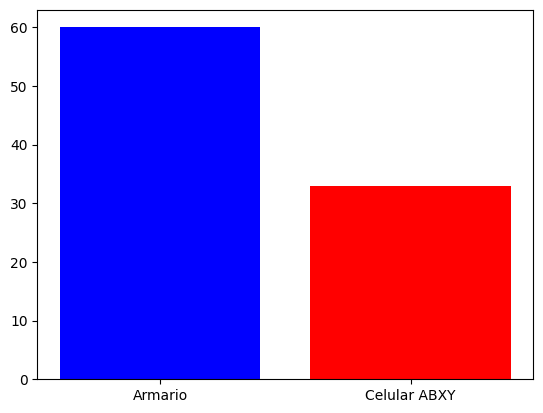

,Producto,Ventas
0,Armario,60
1,Celular ABXY,33


In [47]:
ventas_producto_graf(tienda)

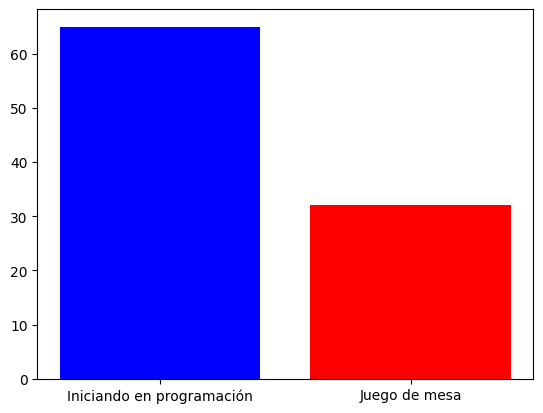

,Producto,Ventas
0,Iniciando en programación,65
1,Juego de mesa,32


In [48]:
ventas_producto_graf(tienda2)

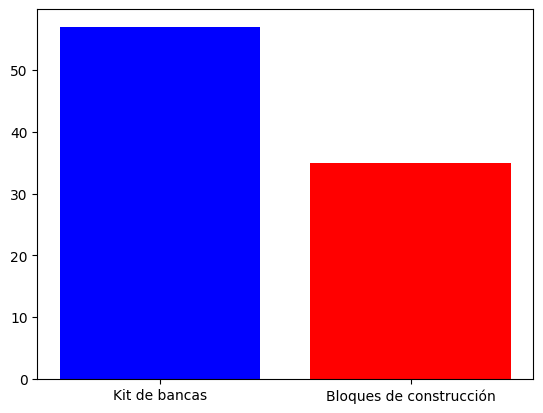

,Producto,Ventas
0,Kit de bancas,57
1,Bloques de construcción,35


In [49]:
ventas_producto_graf(tienda3)

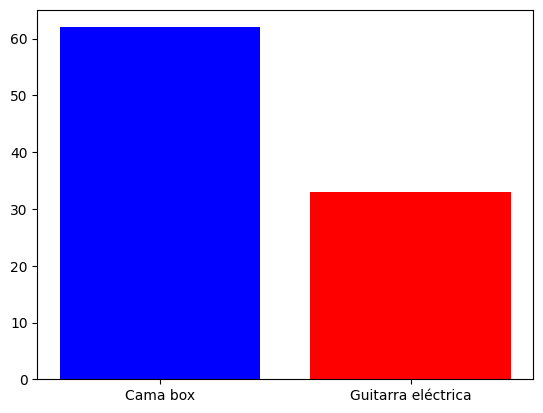

,Producto,Ventas
0,Cama box,62
1,Guitarra eléctrica,33


In [50]:
ventas_producto_graf(tienda4)

<h2>Conclusión en base a Productos mas y menos vendidos</h2>
El producto con mas ventas en todas las tiendas es Iniciando en programación y el de menos ventas es Juego de mesa, ambas lecturas se encuentran en la Tienda 2

# 5. Envío promedio por tienda

In [51]:
promedio_envio_tienda1 = round(sum(tienda['Costo de envío'])/len(tienda['Costo de envío']),2)
promedio_envio_tienda2 = round(sum(tienda2['Costo de envío'])/len(tienda2['Costo de envío']),2)
promedio_envio_tienda3 = round(sum(tienda3['Costo de envío'])/len(tienda3['Costo de envío']),2)
promedio_envio_tienda4 = round(sum(tienda4['Costo de envío'])/len(tienda4['Costo de envío']),2)
print(f'El costo de envío promedio de las tiendas es la siguiente:\nTienda 1: {promedio_envio_tienda1}\nTienda 2: {promedio_envio_tienda2}\nTienda 3: {promedio_envio_tienda3}\nTienda 4: {promedio_envio_tienda4}')

El costo de envío promedio de las tiendas es la siguiente:
Tienda 1: 26018.61
Tienda 2: 25216.24
Tienda 3: 24805.68
Tienda 4: 23459.46


<h2>Conclusión en base a Envío por tienda</h2>
La tienda que genera mayor costo de envío es la Tienda 1 con 26018.61, mientras la tienda que genera un menor costo de envio es la Tienda 4 con 23459.46

<h1>Conclusiones finales </h1>

Las 4 tiendas de Don Juan rinden bastante similar lo cual dificulta la decisión de cual cerrar, en base a este análisis hay ciertos escenarios que deben conisderarse:

1.   En base a las ganacias generadas, Don Juan debe considerar cerrar la tienda 4, que es la que menos ganacias deja en compración al resto de tiendas.
2.   En base a la valoración de la tienda, las tienda con peor valoración es la Tienda 1, que a su vez es la que mas ganacias genera, pero esta valoración negativa en comparación a las demas tiendas, puede dañar el prestigio de las tiendas de Don Juan.

En conclusión, la tienda que don Juan debe cerrar es la Tienda 4 debido a que es la que menos genera, adicionalemente, se sugiere realizar un segundo análisis para poder indagar los motivos que causan la baja valoración de la Tienda 1.




